In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import PcmPy as pcm
import pickle
import globals as gl
import os
import seaborn as sb
from matplotlib.lines import Line2D

plt.style.use('default')

Base directory found: /cifs/diedrichsen/data/Chord_exp/EFC_learningfMRI
Atlas directory found: /cifs/diedrichsen/data/Atlas_templates/fs_LR_32


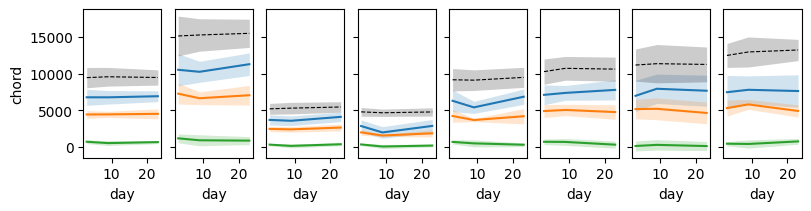

In [2]:
sns = [101, 102, 103]
H = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
days = [3, 9, 23]
path = os.path.join(gl.baseDir, gl.pcmDir)

likelihood = pd.DataFrame()

for sn in sns:
    for day in days:
        for roi in rois:
            T_in = pd.read_pickle(os.path.join(path, f'subj{sn}', f'T_in.day{day}.{H}.{roi}.p'))
            df = T_in['likelihood'].copy()
            df = df - df['null'].iloc[0]
            df['sn'] = sn
            df['day'] = day
            df['roi'] = roi

            likelihood = pd.concat([likelihood, df], ignore_index=True)

fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, constrained_layout=True, figsize=(8, 2))

for r, roi in enumerate(rois):
    ax = axs[r]

    sb.lineplot(data=likelihood[likelihood['roi']==roi], x='day', y='chord', ax=ax, err_kws={'linewidth': 0}, errorbar='se')
    sb.lineplot(data=likelihood[likelihood['roi']==roi], x='day', y='finger', ax=ax, err_kws={'linewidth': 0}, errorbar='se')
    sb.lineplot(data=likelihood[likelihood['roi']==roi], x='day', y='config', ax=ax, err_kws={'linewidth': 0}, errorbar='se')
    sb.lineplot(data=likelihood[likelihood['roi']==roi], x='day', y='ceil', ax=ax, err_kws={'linewidth': 0}, errorbar='se', color='k', lw=.8, ls='--')

plt.show()



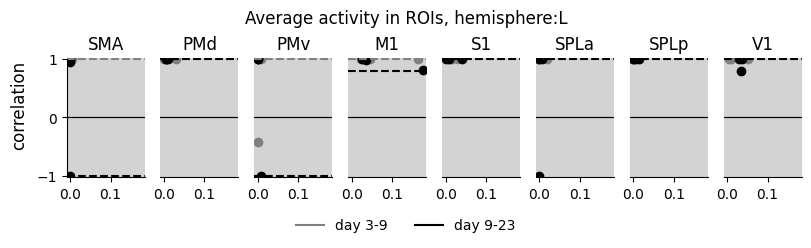

In [3]:
days = [[3, 9], [9, 23]]
H = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
glm = 1
Mflex = pcm.CorrelationModel("flex", num_items=4, corr=None, cond_effect=True)
color = ['grey', 'black']

fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, constrained_layout=True, figsize=(8, 2))

for d, day in enumerate(days):
    for r, roi in enumerate(rois):
        ax = axs[r]

        f = open(os.path.join(gl.baseDir, gl.pcmDir, f'theta_in.corr.glm{glm}.{day[0]}-{day[1]}.{H}.{roi}.p'), 'rb')
        theta_in = pickle.load(f)[-1]

        f = open(os.path.join(gl.baseDir, gl.pcmDir, f'theta_gr.corr.glm{glm}.{day[0]}-{day[1]}.{H}.{roi}.p'), 'rb')
        theta_gr = pickle.load(f)[-1]

        sigma2_1 = np.exp(theta_in[2])
        sigma2_2 = np.exp(theta_in[3])
        r_indiv = Mflex.get_correlation(theta_in)
        sigma2_e = np.exp(theta_in[5])
        SNR = np.sqrt(sigma2_1*sigma2_2)/sigma2_e
        ax.scatter(SNR, r_indiv, color=color[d])

        theta_gr,_ = pcm.group_to_individ_param(theta_gr, Mflex, n_subj=2) # make sure n_subj is correct!!!
        r_group = Mflex.get_correlation(theta_gr)
        ax.axhline(r_group[0], color=color[d], linestyle='--')

        ax.axhline(0, ls='-', color='k', lw=.8)
        ax.set_title(roi)
        ax.set_ylabel('')
        ax.set_xlabel('')

        ax.set_facecolor('lightgrey')

        ax.spines[['top', 'right', 'left']].set_visible(False)

        if r == 0:
            ax.spines['left'].set_visible(True)
            ax.spines['left'].set_bounds((-1, 1))
        else:
            ax.tick_params(axis=('y'), labelbottom=False, labelleft=False, length=0)

fig.supylabel('correlation')
fig.suptitle(f'Average activity in ROIs, hemisphere:{H}')

ax.set_ylim([-1.02, 1.02])

legend_handles = [
    Line2D([0], [0], color='grey', label='day 3-9'),
    Line2D([0], [0], color='k', label='day 9-23'),
]

# Place legend below the entire figure
fig.legend(handles=legend_handles,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.2),
           frameon=False,
           ncol=2,
           fontsize=10)

plt.show()

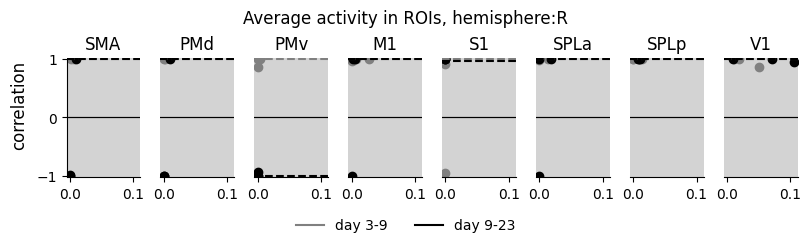

In [4]:
days = [[3, 9], [9, 23]]
H = 'R'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
glm = 1
Mflex = pcm.CorrelationModel("flex", num_items=4, corr=None, cond_effect=True)
color = ['grey', 'black']

fig, axs = plt.subplots(1, len(rois), sharex=True, sharey=True, constrained_layout=True, figsize=(8, 2))

for d, day in enumerate(days):
    for r, roi in enumerate(rois):
        ax = axs[r]

        f = open(os.path.join(gl.baseDir, gl.pcmDir, f'theta_in.corr.glm{glm}.{day[0]}-{day[1]}.{H}.{roi}.p'), 'rb')
        theta_in = pickle.load(f)[-1]

        f = open(os.path.join(gl.baseDir, gl.pcmDir, f'theta_gr.corr.glm{glm}.{day[0]}-{day[1]}.{H}.{roi}.p'), 'rb')
        theta_gr = pickle.load(f)[-1]

        sigma2_1 = np.exp(theta_in[2])
        sigma2_2 = np.exp(theta_in[3])
        r_indiv = Mflex.get_correlation(theta_in)
        sigma2_e = np.exp(theta_in[5])
        SNR = np.sqrt(sigma2_1*sigma2_2)/sigma2_e
        ax.scatter(SNR, r_indiv, color=color[d])

        theta_gr,_ = pcm.group_to_individ_param(theta_gr, Mflex, n_subj=2) # make sure n_subj is correct!!!
        r_group = Mflex.get_correlation(theta_gr)
        ax.axhline(r_group[0], color=color[d], linestyle='--')

        ax.axhline(0, ls='-', color='k', lw=.8)
        ax.set_title(roi)
        ax.set_ylabel('')
        ax.set_xlabel('')

        ax.set_facecolor('lightgrey')

        ax.spines[['top', 'right', 'left']].set_visible(False)

        if r == 0:
            ax.spines['left'].set_visible(True)
            ax.spines['left'].set_bounds((-1, 1))
        else:
            ax.tick_params(axis=('y'), labelbottom=False, labelleft=False, length=0)

fig.supylabel('correlation')
fig.suptitle(f'Average activity in ROIs, hemisphere:{H}')

ax.set_ylim([-1.02, 1.02])

legend_handles = [
    Line2D([0], [0], color='grey', label='day 3-9'),
    Line2D([0], [0], color='k', label='day 9-23'),
]

# Place legend below the entire figure
fig.legend(handles=legend_handles,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.2),
           frameon=False,
           ncol=2,
           fontsize=10)

plt.show()

Text(0.02, 0.5, 'log-likelihood')

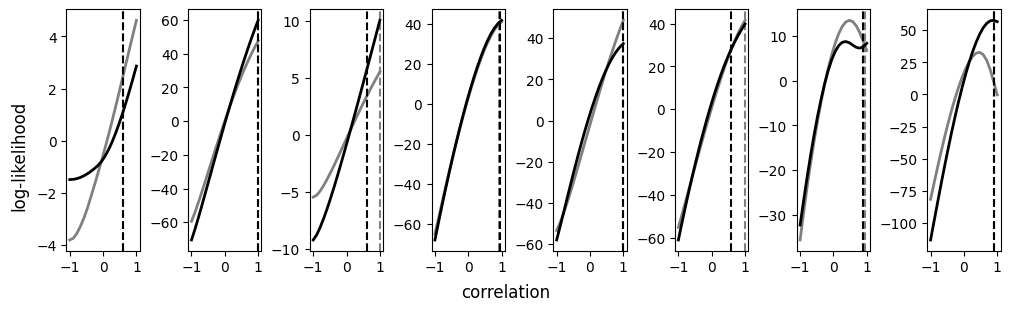

In [2]:
nsteps = 20
M = []
for r in np.linspace(-1, 1, nsteps):
    M.append(pcm.CorrelationModel(f"{r:0.2f}", num_items=4, corr=r, cond_effect=True))
Mflex = pcm.CorrelationModel("flex", num_items=4, corr=None, cond_effect=True)
M.append(Mflex)

days = [[3, 9], [9, 23]]
H = 'L'
rois = ['SMA', 'PMd', 'PMv', 'M1', 'S1', 'SPLa', 'SPLp', 'V1']
glm = 1
color = ['grey', 'black']

fig, axs = plt.subplots(1, len(rois), sharex=True,  constrained_layout=True, figsize=(10, 3))

for d, day in enumerate(days):
    for r, roi in enumerate(rois):
        ax = axs[r]

        T = pd.read_pickle(os.path.join(gl.baseDir, gl.pcmDir, f'T_in.corr.glm{glm}.{day[0]}-{day[1]}.{H}.{roi}.p'))

        f = open(os.path.join(gl.baseDir, gl.pcmDir, f'theta_in.corr.glm{glm}.{day[0]}-{day[1]}.{H}.{roi}.p'), 'rb')
        theta = pickle.load(f)

        L = T.likelihood.to_numpy()
        L = L - L.mean(axis=1).reshape(-1, 1)
        maxL = L[:,-1] # Last model is the flexible
        L = L[:,0:-1] # Remove it

        L_avg = L.mean(axis=0)

        r = np.empty((nsteps,))
        for i in range(nsteps):
            r[i] = M[i].corr

        maxr = M[-1].get_correlation(theta[-1])

        ax.plot(r, L_avg, color=color[d], marker=None, linewidth=2)

        # Plot the mean of the maximum-liklihood estimates in a vertical line
        ax.axvline(maxr.mean(), color=color[d], linestyle='--')


fig.supxlabel('correlation')
fig.supylabel('log-likelihood')